<a href="https://colab.research.google.com/github/arvind2601v/noobcoding/blob/main/Boeing_Financial_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests

# Define the API endpoint
url = "https://financialmodelingprep.com/api/v3/income-statement/BA?limit=120&apikey=85b4e1c468e12c7ef2a5ea0e9a85b1a4"

# Send a GET request to the API endpoint and retrieve the response
response = requests.get(url)

# Convert the response into a JSON object
data = response.json()



In [2]:
data

[{'date': '2022-12-31',
  'symbol': 'BA',
  'reportedCurrency': 'USD',
  'cik': '0000012927',
  'fillingDate': '2023-01-27',
  'acceptedDate': '2023-01-27 14:26:33',
  'calendarYear': '2022',
  'period': 'FY',
  'revenue': 66608000000,
  'costOfRevenue': 63106000000,
  'grossProfit': 3502000000,
  'grossProfitRatio': 0.052576267115061255,
  'researchAndDevelopmentExpenses': 2852000000,
  'generalAndAdministrativeExpenses': 4187000000,
  'sellingAndMarketingExpenses': 0,
  'sellingGeneralAndAdministrativeExpenses': 4187000000,
  'otherExpenses': 0,
  'operatingExpenses': 7039000000,
  'costAndExpenses': 70145000000,
  'interestIncome': 0,
  'interestExpense': 2533000000,
  'depreciationAndAmortization': 1979000000,
  'ebitda': -392000000,
  'ebitdaratio': -0.005885178957482585,
  'operatingIncome': -3537000000,
  'operatingIncomeRatio': -0.05310172952197934,
  'totalOtherIncomeExpensesNet': -1485000000,
  'incomeBeforeTax': -5022000000,
  'incomeBeforeTaxRatio': -0.07539634878693251,
  

In [3]:
# Extract the yearly income data
income_data = [item['revenue'] for item in data]

# Print the yearly income data
print(income_data)

[66608000000, 62286000000, 58158000000, 76559000000, 101127000000, 93392000000, 94571000000, 96114000000, 90762000000, 86623000000, 81698000000, 68735000000, 64306000000, 68281000000, 60909000000, 66387000000, 61530000000, 54845000000, 52457000000, 50485000000, 54069000000, 58198000000, 51321000000, 57993000000, 56154000000, 45800000000, 22681000000, 19515000000, 21924000000, 25438000000, 30184000000, 29314000000, 27595000000, 20276000000, 16962000000, 15355000000, 16341000000, 13636000000]


In [4]:
import pandas as pd
income_data = []
for item in data:
    year = item['date'][:4]
    if year.isdigit() and int(year) >= 2007:
        income_data.append({'year': year, 'revenue': item['revenue'],'Earnings per share' : item['eps'], 'Gross Profit' : item['grossProfit'], 'Net Income' : item['netIncome']})

df = pd.DataFrame(income_data)

# Print the data frame
print(df)

    year       revenue  Earnings per share  Gross Profit   Net Income
0   2022   66608000000            -8.68000    3502000000  -4935000000
1   2021   62286000000            -7.38969    3017000000  -4202000000
2   2020   58158000000           -20.88000   -5685000000 -11873000000
3   2019   76559000000            -1.12000    4466000000   -636000000
4   2018  101127000000            18.05000   19637000000  10460000000
5   2017   93392000000            13.60000   17326000000   8197000000
6   2016   94571000000             7.70000   13781000000   4895000000
7   2015   96114000000             7.52000   14026000000   5176000000
8   2014   90762000000             7.47000   14010000000   5446000000
9   2013   86623000000             6.03000   13355000000   4585000000
10  2012   81698000000             5.15000   13054000000   3900000000
11  2011   68735000000             5.39000   12868000000   4018000000
12  2010   64306000000             4.49000   12463000000   3307000000
13  2009   682810000

In [5]:
df = df.sort_values(by='year')

In [6]:
df

,year,revenue,Earnings per share,Gross Profit,Net Income
15,2007,66387000000,5.38000,12985000000,4074000000
14,2008,60909000000,3.70000,10557000000,2672000000
13,2009,68281000000,1.86000,11741000000,1312000000
12,2010,64306000000,4.49000,12463000000,3307000000
11,2011,68735000000,5.39000,12868000000,4018000000
10,2012,81698000000,5.15000,13054000000,3900000000
9,2013,86623000000,6.03000,13355000000,4585000000
8,2014,90762000000,7.47000,14010000000,5446000000
7,2015,96114000000,7.52000,14026000000,5176000000
6,2016,94571000000,7.70000,13781000000,4895000000


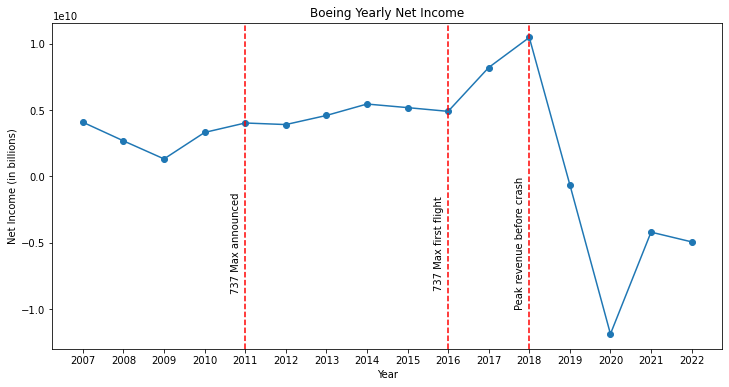

In [124]:
import matplotlib.pyplot as plt

# Plot the revenue data
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df['year'], df['Net Income'], marker='o')

idx = df['year'].tolist().index('2011')
idx2 = df['year'].tolist().index('2016')
idx3 = df['year'].tolist().index('2018')

# Set the title and labels
ax.set_title('Boeing Yearly Net Income')
ax.set_xlabel('Year')
ax.set_ylabel('Net Income (in billions)')
ax.axvline(x=idx, linestyle='--', color='red')
#ax.text(idx, -90000, 'New Airplane Launch', rotation=360, va='bottom', ha='right')
ax.text(idx-0.1, -5000000000, '737 Max announced', rotation=90, va='center', ha='right')
ax.axvline(x=idx2, linestyle='--', color='red')
ax.text(idx2-0.1, -5000000000, '737 Max first flight', rotation=90, va='center', ha='right')
ax.axvline(x=idx3, linestyle='--', color='red')
ax.text(idx3-0.1, -5000000000, 'Peak revenue before crash', rotation=90, va='center', ha='right')
# Display the plot
plt.show()

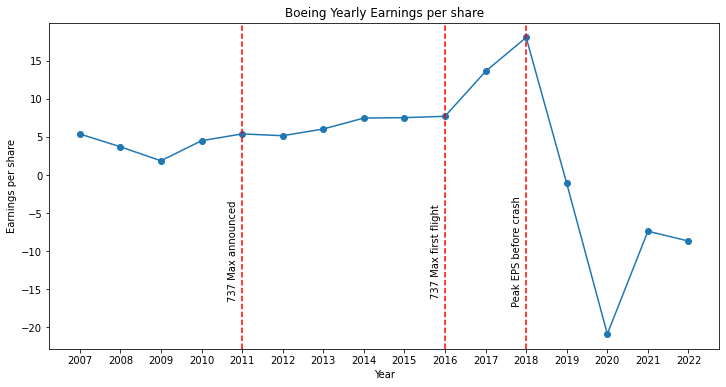

In [8]:
# Plot the revenue data
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df['year'], df['Earnings per share'], marker='o')

idx = df['year'].tolist().index('2011')
idx2 = df['year'].tolist().index('2016')
idx3 = df['year'].tolist().index('2018')

# Set the title and labels
ax.set_title('Boeing Yearly Earnings per share')
ax.set_xlabel('Year')
ax.set_ylabel('Earnings per share')
ax.axvline(x=idx, linestyle='--', color='red')
#ax.text(idx, -90000, 'New Airplane Launch', rotation=360, va='bottom', ha='right')
ax.text(idx-0.1, -10, '737 Max announced', rotation=90, va='center', ha='right')
ax.axvline(x=idx2, linestyle='--', color='red')
ax.text(idx2-0.1, -10, '737 Max first flight', rotation=90, va='center', ha='right')
ax.axvline(x=idx3, linestyle='--', color='red')
ax.text(idx3-0.1, -10, 'Peak EPS before crash', rotation=90, va='center', ha='right')
# Display the plot
plt.show()

In [9]:
# Define the API endpoint
url = "https://financialmodelingprep.com/api/v3/cash-flow-statement/BA?limit=120&apikey=85b4e1c468e12c7ef2a5ea0e9a85b1a4"

# Send a GET request to the API endpoint and retrieve the response
response = requests.get(url)

# Convert the response into a JSON object
cash_flow = response.json()

In [10]:
cash_flow_data = []
for item in cash_flow:
    year = item['date'][:4]
    if year.isdigit() and int(year) >= 2007:
        cash_flow_data.append({'year': year, 'Free Cash Flow': item['freeCashFlow'],'Net change in Cash' : item['netChangeInCash']})

cash_df = pd.DataFrame(cash_flow_data)

# Print the data frame
cash_df = cash_df.sort_values(by='year')
print(cash_df)

    year  Free Cash Flow  Net change in Cash
15  2007      7853000000           924000000
14  2008     -2253000000         -3774000000
13  2009      4417000000          5947000000
12  2010      1825000000         -3856000000
11  2011      2310000000          4690000000
10  2012      5798000000           292000000
9   2013      5941000000         -1253000000
8   2014      6622000000          2645000000
7   2015      6913000000          -431000000
6   2016      7886000000         -2501000000
5   2017     11474000000            12000000
4   2018     13531000000         -1250000000
3   2019     -4407000000          1672000000
2   2020    -19713000000         -1819000000
1   2021     -4396000000           217000000
0   2022      2290000000          6510000000


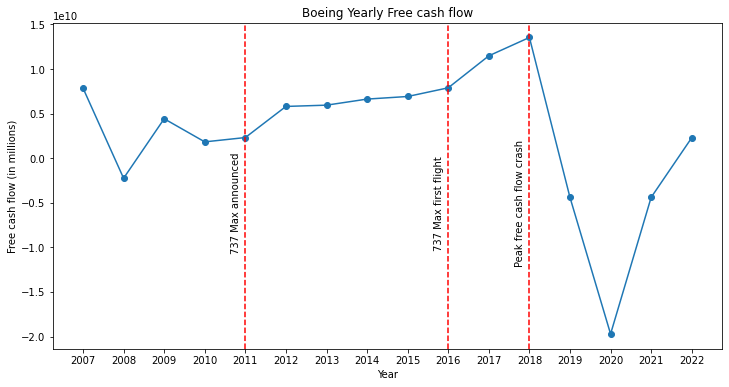

In [11]:
# Plot the revenue data
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(cash_df['year'], cash_df['Free Cash Flow'], marker='o')

idx = cash_df['year'].tolist().index('2011')
idx2 = cash_df['year'].tolist().index('2016')
idx3 = cash_df['year'].tolist().index('2018')

# Set the title and labels
ax.set_title('Boeing Yearly Free cash flow')
ax.set_xlabel('Year')
ax.set_ylabel('Free cash flow (in millions)')
ax.axvline(x=idx, linestyle='--', color='red')
#ax.text(idx, -90000, 'New Airplane Launch', rotation=360, va='bottom', ha='right')
ax.text(idx-0.1, -5000000000, '737 Max announced', rotation=90, va='center', ha='right')
ax.axvline(x=idx2, linestyle='--', color='red')
ax.text(idx2-0.1, -5000000000, '737 Max first flight', rotation=90, va='center', ha='right')
ax.axvline(x=idx3, linestyle='--', color='red')
ax.text(idx3-0.1, -5000000000, 'Peak free cash flow crash', rotation=90, va='center', ha='right')
# Display the plot
plt.show()

In [12]:
pip install --upgrade yfinance


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 KB 893.8 kB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.13
    Uninstalling yfinance-0.2.13:
      Successfully uninstalled yfinance-0.2.13


In [13]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
import yfinance as yf
MyTicker = yf.Ticker("BA")

In [125]:
boeing = yf.download("BA", start="2007-01-01")

[*********************100%***********************]  1 of 1 completed


In [126]:
stock_price = boeing.loc['2007':]

In [127]:
stock_price = stock_price.iloc[::-1]

In [128]:
stock_price['Date'] = pd.to_datetime(stock_price.index)

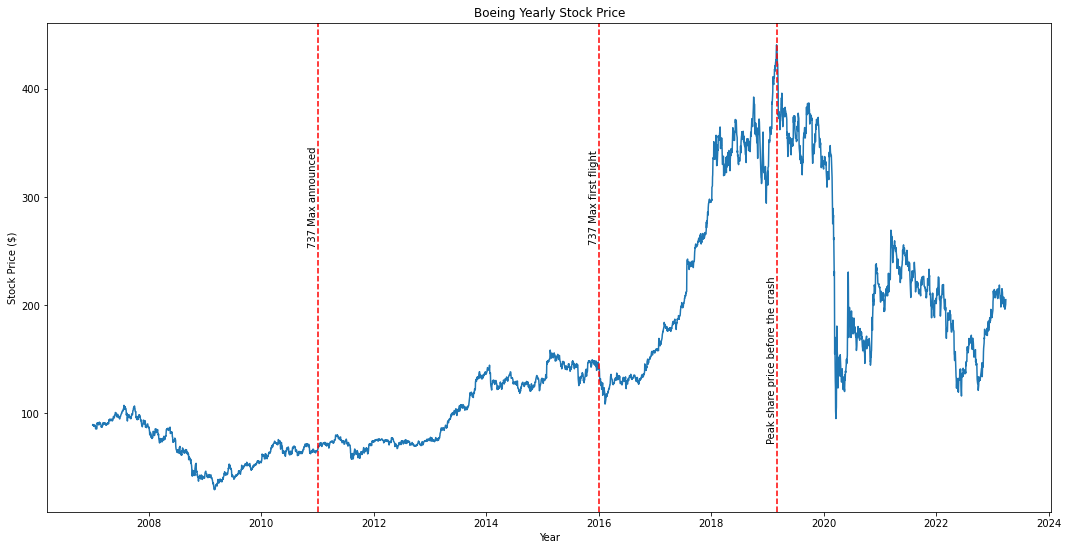

In [129]:
# Plot the revenue data
fig, ax = plt.subplots(figsize=(18, 9))
ax.plot(stock_price['Date'], stock_price['Close'])

# Set the x-axis formatter to display only the year
date_format = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(date_format)

# Set the title and labels
ax.set_title('Boeing Yearly Stock Price')
ax.set_xlabel('Year')
ax.set_ylabel('Stock Price ($)')

# Add vertical lines and annotations
#idx1 = stock_price.index.get_loc(dt.datetime(2011, 1, 3))
#idx2 = stock_price.index.get_loc(dt.datetime(2016, 1, 4))
idx1 = stock_price.loc['2011-01-03'].name
idx2 = stock_price.loc['2016-01-04'].name
idx3 = stock_price['Close'].idxmax()

ax.axvline(x=idx1, linestyle='--', color='red')
ax.text(idx1, 300, '737 Max announced', rotation=90, va='center', ha='right')
ax.axvline(x=idx2, linestyle='--', color='red')
ax.text(idx2, 300, '737 Max first flight', rotation=90, va='center', ha='right')
ax.axvline(x=idx3, linestyle='--', color='red')
ax.text(idx3, 150, 'Peak share price before the crash', rotation=90, va='center', ha='right')

# Display the plot
plt.show()
